{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}
/home/data/cuhk03_release found :)
/home/data/Market-1501-v15.09.15 found :)
/home/data/DukeMTMC-reID found :)
found memmaped /home/data/cuhk03_release/labeled112x112.npy
(cuhk) positive test pairs: 9290
(cuhk) positive train pairs: 127242
(market) positive test pairs:  300631
(market) positive train pairs:  309874
load memmap /home/data/DukeMTMC-reID/bounding_box_test112x112.npy
load memmap /home/data/DukeMTMC-reID/bounding_box_train112x112.npy
(duke) positive test pairs:  926089
(duke) positive train pairs:  749270


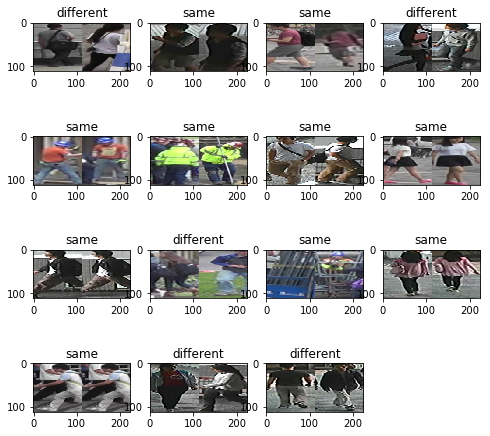

In [1]:
%matplotlib inline
import sys
sys.path.insert(0,'../')
from pprint import pprint
import json
Settings = json.load(open('settings.txt'))
pprint(Settings)
import matplotlib.pyplot as plt
import numpy as np

root = Settings['data_root']

from cabbage.data import ReId

sampler = ReId.DataSampler(root, 112, 112)

X, Y = sampler.get_train_batch(10, 5)
x = X[0]

fig = plt.figure(figsize=(8,8))

for i,(x,y) in enumerate(zip(X,Y)):
    ax = fig.add_subplot(4,4,i+1)
    txt = 'same' if y[0] == 1 else 'different'
    ax.set_title(txt)
    a = x[:,:,0:3]
    b = x[:,:,3:6]
    x = np.concatenate([a, b], axis=1)
    ax.imshow(x)

plt.show()

/home/data/cuhk03_release found :)
/home/data/Market-1501-v15.09.15 found :)
/home/data/DukeMTMC-reID found :)
found memmaped /home/data/cuhk03_release/labeled64x64.npy
(cuhk) positive test pairs: 9290
(cuhk) positive train pairs: 127242
(market) positive test pairs:  300631
(market) positive train pairs:  309874
load memmap /home/data/DukeMTMC-reID/bounding_box_test64x64.npy
load memmap /home/data/DukeMTMC-reID/bounding_box_train64x64.npy
(duke) positive test pairs:  926089
(duke) positive train pairs:  749270


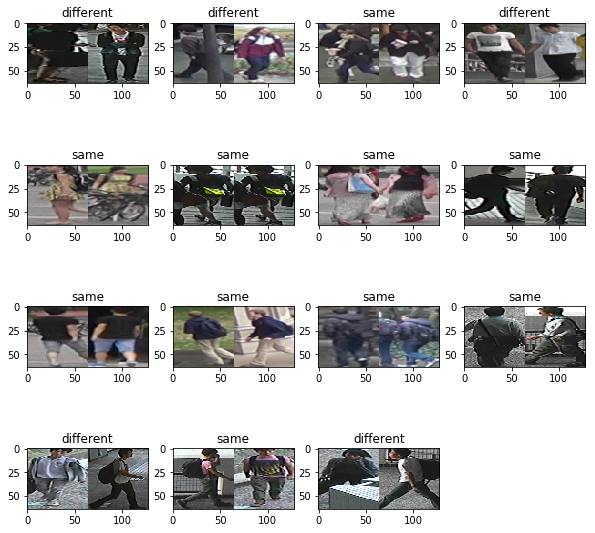

In [2]:
sampler = ReId.DataSampler(root, 64, 64)

X, Y = sampler.get_train_batch(10, 5)
x = X[0]

fig = plt.figure(figsize=(10,10))

for i,(x,y) in enumerate(zip(X,Y)):
    ax = fig.add_subplot(4,4,i+1)
    txt = 'same' if y[0] == 1 else 'different'
    ax.set_title(txt)
    a = x[:,:,0:3]
    b = x[:,:,3:6]
    x = np.concatenate([a, b], axis=1)
    ax.imshow(x)

plt.show()

## MOT16 data

In [3]:
root = Settings['data_root']

from cabbage.data.MOT16Sampler import MOT16Sampler

mot16_sampler = MOT16Sampler(root)

/home/data/MOT16 found :)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-02/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
MOT16-02 visible:  (17833, 9)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-04/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
MOT16-04 visible:  (47557, 9)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-05/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
MOT16-05 visible:  (6818, 9)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-09/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
MOT16-09 visible:  (5257, 9)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-10/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
MOT16-10 visible:  (12318, 9)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-11/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded
MOT16-11 visible:  (9174, 9)
MOT16: load memmapped file /home/data/MOT16/train/MOT16-13/